In [1]:
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify
from datetime import datetime as dt
import datetime as dt
import numpy as np
import pandas as pd
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float, Text, Date
import pymysql
pymysql.install_as_MySQLdb()

In [120]:
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)
conn = engine.connect()

In [121]:
precipitation = pd.read_sql('measurements', conn, parse_dates={'date': {'format': '%Y-%m-%d'}}, columns=['date', 'prcp'])

In [122]:
precipitation['month'] = precipitation.date.map(lambda x: x.strftime('%m')).astype('Int64')
precipitation['year'] = precipitation.date.map(lambda x: x.strftime('%Y')).astype('Int64')
precipitation['month_year'] = precipitation['year']*100 + precipitation['month']


In [123]:
# Rank month_year by Desc
precipitation = precipitation.sort_values(by='month_year', ascending=False).reset_index(drop = True)
target = precipitation.month_year.unique()[0:12]
precipitation = precipitation[precipitation['month_year'].astype(str).str.contains('|'.join(target.astype('str')))][['date', 'prcp']]

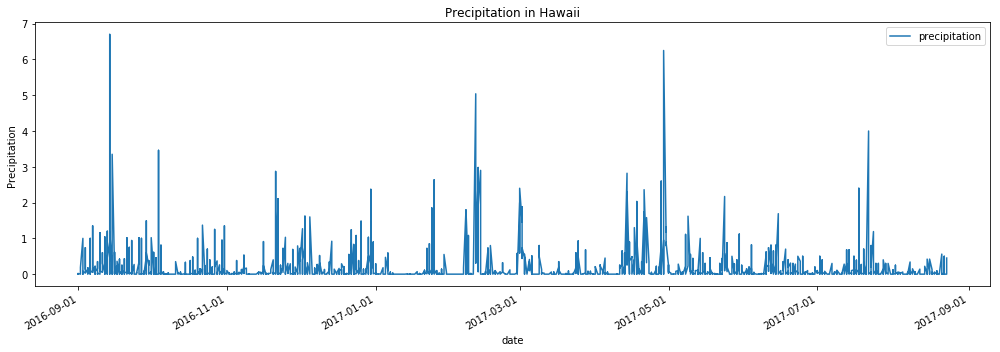

In [124]:
precipitation.set_index('date', inplace= True)
precipitation.columns = ['precipitation']
ax = precipitation.plot(figsize = (14, 5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title("Precipitation in Hawaii")
plt.ylabel("Precipitation")
plt.tight_layout()
#plt.savefig('HWPrecipitaion.png')
plt.show()

In [26]:
precipitation.describe()

precipitation
count    2171.000000
mean        0.155444
std         0.433053
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000

In [27]:
print('# of Unique Stations:', conn.execute('SELECT COUNT(DISTINCT(station)) FROM stations').fetchall()[0][0])

# of Unique Stations: 9


In [28]:
conn.execute('SELECT station, SUM(tobs) \
              FROM measurements  \
              GROUP BY station \
              ORDER BY SUM(tobs) DESC').fetchall()

[('USC00519397', 203083),
 ('USC00519523', 198957),
 ('USC00519281', 198652),
 ('USC00513117', 196915),
 ('USC00516128', 185230),
 ('USC00514830', 164871),
 ('USC00511918', 141728),
 ('USC00517948', 102467),
 ('USC00518838', 37162)]

In [29]:
# Which station has the highest number of observations?
print('Station with highest tobs:', conn.execute('SELECT station, SUM(tobs) \
              FROM measurements  \
              GROUP BY station \
              ORDER BY SUM(tobs) DESC').fetchall()[0][0])

Station with highest tobs: USC00519397


In [30]:
conn.execute('SELECT MAX(date) FROM measurements').fetchall()[0][0]

'2017-08-23'

In [31]:
data = conn.execute("SELECT station, date, SUM(tobs) \
                     FROM measurements \
                     WHERE date >= '2016-08-23' AND station == 'USC00519397' \
                     GROUP BY station, date").fetchall()
data = pd.DataFrame(data)
data.columns = ['station', 'date', 'tobs']

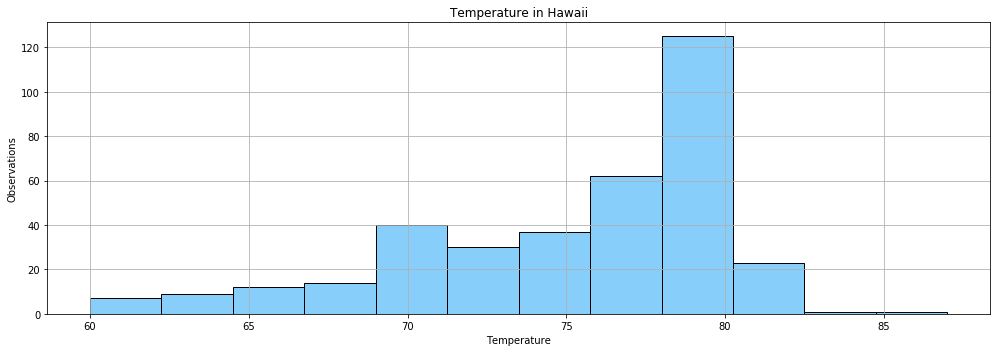

In [117]:
plt.figure(figsize=(14,5))
plt.hist(data['tobs'], bins = 12, color = 'lightskyblue', edgecolor='black')
plt.title("Temperature in Hawaii")
plt.xlabel('Temperature')
plt.ylabel('Observations')
plt.tight_layout()
#plt.savefig('HWTemp.png')
plt.grid()

In [99]:
tobs = pd.read_sql('measurements', conn, parse_dates={'date': {'format': '%Y-%m-%d'}}, columns=['date', 'tobs'])

In [111]:
def calc_temps(start, end):
    df = tobs[(tobs.date >= start) & (tobs.date <= end)]
    dic = {}
    dic['min'] = df.tobs.min()
    dic['avg'] = df.tobs.mean()
    dic['max'] = df.tobs.max()
    return(dic)

start_date = '2017-04-10'
end_date = '2017-04-25'

temps = calc_temps(start_date, end_date)

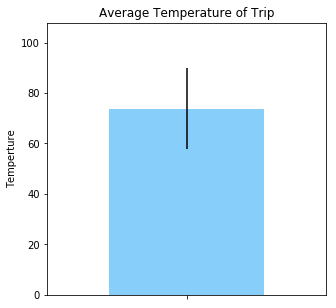

In [116]:
plt.figure(figsize=(5,5))
plt.margins(.4,.2)
plt.bar(0, height = temps['avg'], tick_label = '', yerr = temps['max'] - temps['min'], color = 'lightskyblue')
plt.title('Average Temperature of Trip')
plt.ylabel('Temperture')
#plt.savefig('AvgTripTemp.png')
plt.show()